In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import re

## US Foods - Weekly Sales Data - Test

In [3]:
test = pd.read_csv(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2023-05-05\US Foods Update.csv')

print(f'Shape: {test.shape}')
print(f'Columns: {test.columns}')
print(test.info())
display(test.head(4))


Shape: (76612, 23)
Columns: Index(['Region', 'Area', 'Market', 'Pyramid Segment', 'Business Unit',
       'Merch Category', 'PIM Group', 'MFG #', 'PIM #', 'ASYS #',
       'Product Description', 'Pack Size', 'Vendor #', 'Vendor', 'Brand',
       'Brand Type', 'Attribute 1', 'Attribute 2', 'Attribute 3',
       'Attribute 4', 'Attribute 5', 'Year Week', 'LB Current'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76612 entries, 0 to 76611
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region               76612 non-null  object
 1   Area                 76612 non-null  object
 2   Market               76612 non-null  object
 3   Pyramid Segment      76612 non-null  object
 4   Business Unit        76612 non-null  object
 5   Merch Category       76612 non-null  object
 6   PIM Group            76612 non-null  object
 7   MFG #                76612 non-null  int64 
 8   PIM 

,Region,Area,Market,Pyramid Segment,Business Unit,Merch Category,PIM Group,MFG #,PIM #,ASYS #,...,Vendor,Brand,Brand Type,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Year Week,LB Current
0,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,FRIED APPETIZERS,"APPETIZERS, VEGETABLES OTHER, BREADED & BATTERED",10750947016097,90009498,5903991,...,MCCAIN FOODS USA,MONARCH,Exclusive Brand,-,-,-,-,-,202308,12.00
1,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,"HANDHELD, FROZEN & REF","SANDWICHES, FROZEN",10072714106887,4702841,4862793,...,MCCAIN FOODS USA,MCCAIN,National Brand,-,-,-,-,-,202313,75.00
2,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,NOT FRIED FROZEN POTATOES,"POTATOES, MASHED, FROZEN",10072714834568,1520875,8292377,...,MCCAIN FOODS USA,MCCAIN,National Brand,Quality: GOOD,POTATO TYPE: MASHED,SKIN ON/OFF: WHITE,FLAVOR TYPE: SKINLESS,-,202305,96.00
3,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,NOT FRIED FROZEN POTATOES,"POTATOES, MASHED, FROZEN",10072714834568,1520875,8292377,...,MCCAIN FOODS USA,MCCAIN,National Brand,Quality: GOOD,POTATO TYPE: MASHED,SKIN ON/OFF: WHITE,FLAVOR TYPE: SKINLESS,-,202306,360.00


## US Foods - Sales Data Combine
- Loop through directory and combine each file
- Only new data is added, filters out previously known weeks in new data

In [2]:
%%time

# Source directory
dir_path = r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files'

# Main dataframe holding all sales data
df_sellout = pd.DataFrame()

# Loop through all files and subdirectories under the directory
for root, dirs, files in os.walk(dir_path):
    for filename in files:
        # Get the full path of the file
        file_path = os.path.join(root, filename)

        #look for all files with US Foods and .csv in title
        # r denotes a raw string literal in Python, indicating that backslashes \ should be treated as literal characters rather than escape characters.
        # .* matches any character (except a newline) zero or more times. The dot . represents any character, and the asterisk * means "zero or more occurrences."
        # US Foods Update is a literal string that must be matched exactly.
        # .* again matches any character zero or more times.
        # \. is used to match a literal dot character. The backslash \ is used to escape the dot, as a bare dot in a regular expression has a special meaning (matches any character).
        # csv is a literal string that must be matched exactly.
        # $ is an anchor that represents the end of the string.
        pattern = r'.*US Foods Update.*\.csv$'

        # If filename matches pattern
        if re.search(pattern, filename):
            # Read the CSV file into a temporary dataframe
            df_temp = pd.read_csv(file_path)

            #if not empty dataframe
            if not df_sellout.empty:
                #if column named "Year Week" found then only keep weeks that are not in main data file
                if 'Year Week' in df_temp:
                    unique_dates = df_sellout['Year Week'].unique()
                    df_temp = df_temp[df_temp['Year Week'].isin(unique_dates) == False]
                else:
                    df_temp = pd.DataFrame()
            
            # Concatenate the filtered data into the main dataframe
            if len(df_temp) > 0:
                df_sellout = pd.concat([df_sellout, df_temp], ignore_index=True)

print(f'Shape: {df_sellout.shape}')
df_sellout.head(4)

Shape: (723826, 25)
CPU times: total: 1min 22s
Wall time: 1min 27s


,Region,Area,Market,Pyramid Segment,Business Unit,Merch Category,PIM Group,MFG #,PIM #,ASYS #,...,Brand Type,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Year Week,LB Current,Director,Desk
0,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,FRIED FROZEN POTATOES,"POTATOES, FORMED PRODUCTS FROZEN",10072714937580,1252567,6512164,...,National Brand,Quality: GOOD,POTATO SUB CATEGORY: WHITE,POTATO CUT TYPE: ALL OTHER POTATO,POTATO CUT DESCRIPTION: CHOPPED AND FORMED,-,202109,36.00,NaN,NaN
1,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,GRIDDLE,"PANCAKE, WAFFLE, FRENCH TOAST, THAW & SERVE, F...",50758108767183,18072206,9841260,...,Exclusive Brand,-,-,-,-,-,202103,430.00,NaN,NaN
2,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,GRIDDLE,"PANCAKE, WAFFLE, FRENCH TOAST, THAW & SERVE, F...",50758108767183,18072206,9841260,...,Exclusive Brand,-,-,-,-,-,202104,20.00,NaN,NaN
3,CENTRAL,DAKOTAS,BISMARCK,EDUCATION,GROCERY & DAIRY,GRIDDLE,"PANCAKE, WAFFLE, FRENCH TOAST, THAW & SERVE, F...",50758108767183,18072206,9841260,...,Exclusive Brand,-,-,-,-,-,202107,20.00,NaN,NaN


### Import Data Dictionaries
- SKU Mapping - to map GTIN to McCain SKU ID
- Date mapping - to map week ID to dates

In [3]:
mappings = pd.read_excel(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Distributor Sell-Out Dictionaries\US Foods - US.xlsx', 
                          sheet_name='SKU Mapping')

timemap = pd.read_excel(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Distributor Sell-Out Dictionaries\Time Definitions.xlsx', 
                          sheet_name='time')

mappings.head(3)

,Merch Cat#,Merch Category,PIM Grp#,PIM Group,Manufacturer Item Number,Product,Pack Size,Vend#,Vendor,Brand,Consolidated Category,L1 Product Hierarchy,L2 Product Hierarchy,McCain SKU ID
0,76.0,COOKIES,1433.0,"COOKIES, READY TO EAT, FROZEN",10072714003742,"COOKIE, SNDWH CHOC VNL CRM",6/4 LB,30.0,MCCAIN FOODS USA,MCCAIN,Prepared Foods,Local Portfolio,Bakery,1000004861
1,76.0,COOKIES,1433.0,"COOKIES, READY TO EAT, FROZEN",10072714006040,"COOKIE, SNDWH CHOC VNL CRM",6/4 LB,30.0,MCCAIN FOODS USA,SONIC,Prepared Foods,Local Portfolio,Bakery,1000007909
2,97.0,DESSERT BARS,1518.0,"BROWNIES, FROZEN",10072714105224,"BROWNIE, DBL CHOC NOT ICED",2/64 OZ,30.0,MCCAIN FOODS USA,MCCAIN,Prepared Foods,Local Portfolio,Bakery,15010522


In [19]:
print(timemap)

     Calendar Year  Calendar Week  Calendar Week Year  YOY Week   
0             2019              1              201901    201801  \
1             2019              2              201902    201802   
2             2019              3              201903    201803   
3             2019              4              201904    201804   
4             2019              5              201905    201805   
..             ...            ...                 ...       ...   
256           2023             48              202348    202248   
257           2023             49              202349    202249   
258           2023             50              202350    202250   
259           2023             51              202351    202251   
260           2023             52              202352    202252   

     Baseline Week Week Starting (Mon) Week Ending (Sun)   
0           201901          2018-12-31        2019-01-06  \
1           201902          2019-01-07        2019-01-13   
2           201

### Map 

In [4]:
map_columns = ['Manufacturer Item Number','McCain SKU ID']
time_columns = ['Calendar Week Year','Week Ending (Sun)']

sku_dict = mappings[map_columns].set_index('Manufacturer Item Number').to_dict()
time_dict = timemap[time_columns].set_index('Calendar Week Year').to_dict()

df_sellout['McCain SKU ID'] = df_sellout['MFG #'].map(sku_dict['McCain SKU ID'])

df_sellout['Week Ending (Sun)'] = df_sellout['Year Week'].map(time_dict['Week Ending (Sun)'])

#matches any character that is not a digit (\d) or a period (.)
df_sellout.loc[:, 'LBS'] = df_sellout['LB Current'].apply(lambda x: float(re.sub(r'[^\d.]', '', x)))

print(df_sellout.columns)

Index(['Region', 'Area', 'Market', 'Pyramid Segment', 'Business Unit',
       'Merch Category', 'PIM Group', 'MFG #', 'PIM #', 'ASYS #',
       'Product Description', 'Pack Size', 'Vendor #', 'Vendor', 'Brand',
       'Brand Type', 'Attribute 1', 'Attribute 2', 'Attribute 3',
       'Attribute 4', 'Attribute 5', 'Year Week', 'LB Current', 'Director',
       'Desk', 'McCain SKU ID', 'Week Ending (Sun)', 'LBS'],
      dtype='object')


In [8]:
print(df_sellout.shape)
df_sellout['Week Ending (Sun)'].agg(['min','max'])

(705816, 28)


min   2021-01-24
max   2023-09-03
Name: Week Ending (Sun), dtype: datetime64[ns]

### Chart Overall Volume

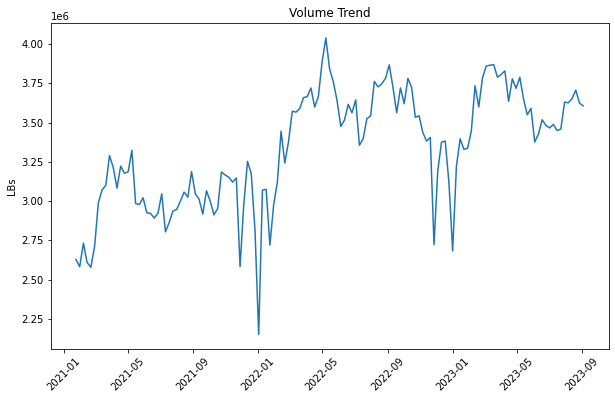

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

graph_data = df_sellout.groupby('Week Ending (Sun)')['LBS'].sum().reset_index()

# Convert week ending dates to datetime objects
graph_data['Week Ending (Sun)'] = pd.to_datetime(graph_data['Week Ending (Sun)'])

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10,6))

# Create the line chart
ax.plot(graph_data['Week Ending (Sun)'], graph_data['LBS'])

# Set the y-axis label
ax.set_ylabel('LBs')

# Set the chart title
ax.set_title('Volume Trend')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

## Save Sell-Out Data

In [5]:
df_sellout.to_csv(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Data Update\files\usfoods_sellout.csv', index=False)

In [32]:
orders = pd.read_pickle(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Trade Claims Deductions\ref\sales.pkl')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129898 entries, 0 to 3129897
Data columns (total 34 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   day_calendar_date         datetime64[ns]
 1   month_begin               datetime64[ns]
 2   month_id                  object        
 3   sales_order_id            object        
 4   po_number                 object        
 5   material_id               object        
 6   material_desc             object        
 7   category                  object        
 8   customer_material_id      object        
 9   plant_id                  object        
 10  plant_name                object        
 11  sold_to_id                object        
 12  sold_to_name              object        
 13  currency_id               object        
 14  netprice                  float32       
 15  sales_organisation_id     object        
 16  sold_to_l1_id             object        
 17  sold_to_

In [44]:
import datetime

def fiscal_quarter(x):
    if x >= 7 and x <= 9:
        return 1
    elif x >= 10 and x <= 12:
        return 2
    elif x >= 1 and x <= 3:
        return 3
    elif x >= 4 and x <= 6:
        return 4

orders = orders[(orders['sold_to_l1']=='US FOODS L1') & (orders['sales_organisation_id']=='US01')]

orders['year'] = orders['month_begin'].dt.year
orders['month'] = orders['month_begin'].dt.month

orders['day_calendar_date'] = pd.to_datetime(orders['day_calendar_date'])

orders['week_ending_sunday'] = orders['day_calendar_date'].apply(lambda x: x + pd.to_timedelta((6 - x.weekday()) % 7, unit='d'))

orders['fiscal_year'] = orders.apply(lambda x: x['year'] + 1 if x['month'] > 6 else x['year'], axis=1)
orders['fiscal_period'] = orders.apply(lambda x: x['month'] - 6 if x['month'] > 6 else x['month'] + 6, axis=1)
orders['fiscal_quarter'] = orders['month'].apply(fiscal_quarter)

orders.head()

,day_calendar_date,month_begin,month_id,sales_order_id,po_number,material_id,material_desc,category,customer_material_id,plant_id,...,shortedquantitycs,totalvalue,totalshortvalue,netcostlc,year,month,fiscal_year,fiscal_period,fiscal_quarter,week_ending_sunday
35,2020-01-01,2020-01-01,202001,6072209,1031905D,1000001542,MCCAIN SIGNATURE 3/8 SC SKIN ON 6X5,Potato,7141364,2252,...,0.0,24422.400391,0.0,13485.570312,2020,1,2020,7,3,2020-01-05
743,2020-01-02,2020-01-01,202001,6058462,9618554Q,1000001467,GCP BRD CD CHS POT BITES 4X3LB,Prepared Foods,9865114,2110,...,0.0,64.260002,0.0,34.330002,2020,1,2020,7,3,2020-01-05
744,2020-01-02,2020-01-01,202001,6058462,9618554Q,1000002997,D_CRW BRB THCK ON RINGS 6/2.5,Prepared Foods,7862756,2110,...,0.0,193.100006,0.0,157.330002,2020,1,2020,7,3,2020-01-05
745,2020-01-02,2020-01-01,202001,6058462,9618554Q,1000007587,USF 5/16 XL BEER FRIES 6X5LB,Potato,7731531,2110,...,0.0,5918.399902,0.0,2160.969971,2020,1,2020,7,3,2020-01-05
746,2020-01-02,2020-01-01,202001,6058462,9618554Q,40010016,MOR TAN 1/8 BRD ON SLVRS 6X2LB,Prepared Foods,7364995,2110,...,0.0,2816.100098,0.0,1196.410034,2020,1,2020,7,3,2020-01-05


In [46]:
orders.columns

Index(['day_calendar_date', 'month_begin', 'month_id', 'sales_order_id',
       'po_number', 'material_id', 'material_desc', 'category',
       'customer_material_id', 'plant_id', 'plant_name', 'sold_to_id',
       'sold_to_name', 'currency_id', 'netprice', 'sales_organisation_id',
       'sold_to_l1_id', 'sold_to_l1', 'sold_to_l2_id', 'sold_to_l2', 'on_tos',
       'route', 'ship_to_zone', 'orderedquantitycs', 'confirmedquantitycs',
       'orderedquantitylb', 'orderedquantitygrosslb', 'deliveredquantitycs',
       'deliveredquantitylb', 'deliveredquantitygrosslb', 'shortedquantitycs',
       'totalvalue', 'totalshortvalue', 'netcostlc', 'year', 'month',
       'fiscal_year', 'fiscal_period', 'fiscal_quarter', 'week_ending_sunday'],
      dtype='object')

In [36]:
orders['sold_to_name'].value_counts()

sold_to_name
US FOODS FORT MILL        8567
US FOODS GREENSBURG       7492
US FOODS ATLANTA          5942
US FOODS COLUMBIA         5827
US FOODS SAN FRANCISCO    5806
                          ... 
US FOODS ANCHORAGE         519
US FOODS SAN DIEGO         511
US FOODS LUBBOCK           416
US FOODS SIOUX FALLS       305
USF NEW ORLEANS             28
Name: count, Length: 72, dtype: int64

In [37]:
orders['category'].value_counts()

category
Potato            103643
Prepared Foods     80021
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


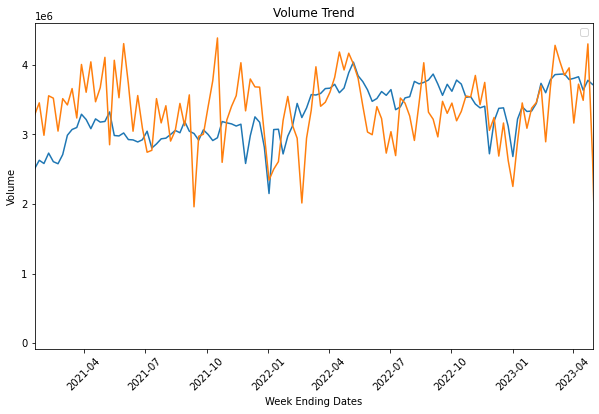

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

graph_data1 = df.groupby('Week Ending (Sun)')['LBS'].sum().reset_index()
graph_data2 = orders.groupby('week_ending_sunday')['deliveredquantitylb'].sum().reset_index()
# Convert week ending dates to datetime objects
graph_data1['Week Ending (Sun)'] = pd.to_datetime(graph_data1['Week Ending (Sun)'])

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10,6))

# Create the line chart
ax.plot(graph_data1['Week Ending (Sun)'], graph_data1['LBS'])
ax.plot(graph_data2['week_ending_sunday'], graph_data2['deliveredquantitylb'])

# Set the x-axis label
ax.set_xlabel('Week Ending Dates')

ax.set_xlim(graph_data1['Week Ending (Sun)'].min(), graph_data1['Week Ending (Sun)'].max())

# Set the y-axis label
ax.set_ylabel('Volume')

# Set the chart title
ax.set_title('Volume Trend')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

## US Foods - Inventory - Test

In [28]:
test = pd.read_excel(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2023-06-02\US Foods Inv\21 May 2023.xlsx')

print(f'Shape: {test.shape}')
print(f'Columns: {test.columns}')
print(test.info())
test.head(4)

Shape: (2820, 14)
Columns: Index(['Market', 'Area', 'Region', 'ASYS Number', 'Product',
       'Reserved Quantity', 'Manufacturer Item Number', 'Manufacturer GTIN',
       'Brand Name', 'Inventory on Hand', 'Inventory on Order',
       'Days of Inventory', 'Weekly Forecast', '13 Week Forecast'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Market                    2820 non-null   object 
 1   Area                      2820 non-null   object 
 2   Region                    2820 non-null   object 
 3   ASYS Number               2820 non-null   int64  
 4   Product                   2820 non-null   object 
 5   Reserved Quantity         2820 non-null   float64
 6   Manufacturer Item Number  2820 non-null   int64  
 7   Manufacturer GTIN         2820 non-null   int64  
 8   Brand Name         

,Market,Area,Region,ASYS Number,Product,Reserved Quantity,Manufacturer Item Number,Manufacturer GTIN,Brand Name,Inventory on Hand,Inventory on Order,Days of Inventory,Weekly Forecast,13 Week Forecast
0,ALBANY,UPSTATE NEW YORK,NORTHEAST,348698,"POTATO, FF 3/8 CC LINE FLO",0.0,30,10072714180504,GOLDEN FRY,13,10,25,10,30
1,ALBANY,UPSTATE NEW YORK,NORTHEAST,659771,"POTATO, FF SWT 7/16 CC XLF",6.0,30,10072714945660,MCCAIN,101,36,43,24,60
2,ALBANY,UPSTATE NEW YORK,NORTHEAST,747410,"POTATO, FF 3/8 SC LINE",3.0,0,50758108109693,VALUE WAY,428,490,32,140,140
3,ALBANY,UPSTATE NEW YORK,NORTHEAST,987149,"POTATO, SKN MED 200 CT BKD FZN",0.0,30,10072714036023,MCCAIN,7,10,36,0,20


## US Foods - Inventory - Import
- Loop through directory, triggered by naming convention


In [6]:
import datetime
import os

dir_path = r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files'

all_inv = pd.DataFrame()

# Loop through all files and subdirectories under the directory
for root, dirs, files in os.walk(dir_path):
    for filename in files:
        # Get the full path of the file
        file_path = os.path.join(root, filename)

        #look for all files with US Foods and .csv in title
        # \d{2}: Matches exactly two digits (in this case, the day).
        # \s: Matches a single whitespace character.
        # (?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec): Non-capturing group that matches any three-letter month abbreviation, representing January to December.
        # \s: Matches a single whitespace character.
        # \d{4}: Matches exactly four digits (in this case, the year).
        pattern = r'\d{2}\s(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{4}'
        
        if re.search(pattern, filename):
            # Read the CSV file into a temporary dataframe
            df_temp = pd.read_excel(file_path)
            
            filename_str = os.path.splitext(filename)[0]

            date_str = datetime.datetime.strptime(filename_str, "%d %b %Y").date()

            df_temp['Date'] = date_str

            # Concatenate the filtered data into the main dataframe
            if len(df_temp) > 0:
                all_inv = pd.concat([all_inv, df_temp], ignore_index=True)

print(all_inv.shape)
all_inv.head(4)

(733384, 15)


,Market,Area,Region,ASYS Number,Product,Reserved Quantity,Manufacturer Item Number,Manufacturer GTIN,Brand Name,Inventory on Hand,Inventory on Order,Days of Inventory,Weekly Forecast,13 Week Forecast,Date
0,ALBANY,UPSTATE NEW YORK,NORTHEAST,348698,"POTATO, FF 3/8 CC LINE FLO",0.0,30,10072714180504,GOLDEN FRY,22,10,38,0,30,2023-02-01
1,ALBANY,UPSTATE NEW YORK,NORTHEAST,659771,"POTATO, FF SWT 7/16 CC XLF",18.0,30,10072714945660,MCCAIN,161,108,37,0,324,2023-02-01
2,ALBANY,UPSTATE NEW YORK,NORTHEAST,747410,"POTATO, FF 3/8 SC LINE",25.0,0,50758108109693,VALUE WAY,277,0,13,420,420,2023-02-01
3,ALBANY,UPSTATE NEW YORK,NORTHEAST,987149,"POTATO,SKN MED 200 CT BKD FZN",0.0,30,10072714036023,MCCAIN,0,13,30,0,14,2023-02-01


In [7]:
from datetime import datetime, timedelta

map_columns = ['Manufacturer Item Number','McCain SKU ID']

sku_dict = mappings[map_columns].set_index('Manufacturer Item Number').to_dict()

all_inv['McCain SKU ID'] = all_inv['Manufacturer GTIN'].map(sku_dict['McCain SKU ID'])

all_inv['Date'] = pd.to_datetime(all_inv['Date'])

all_inv['Week Ending Date (Sun)'] = all_inv['Date'].dt.to_period("W-SUN").dt.start_time + timedelta(days=6)

all_inv.columns

Index(['Market', 'Area', 'Region', 'ASYS Number', 'Product',
       'Reserved Quantity', 'Manufacturer Item Number', 'Manufacturer GTIN',
       'Brand Name', 'Inventory on Hand', 'Inventory on Order',
       'Days of Inventory', 'Weekly Forecast', '13 Week Forecast', 'Date',
       'McCain SKU ID', 'Week Ending Date (Sun)'],
      dtype='object')

In [8]:
all_inv[all_inv['Week Ending Date (Sun)']=='2023-07-02'].groupby('Date').size()

Date
2023-06-26    2789
2023-06-27    2803
2023-06-28    2808
2023-06-29    2812
2023-06-30    2801
2023-07-01    2804
2023-07-02    2803
dtype: int64

### Pull Product Dimensions from Synapse

In [9]:
import pyodbc

def run_prod_query(query_str):
    server = 'azure-synapse-workspace-01-prod.sql.azuresynapse.net'
    database = 'GDASQLPool01PROD'
    driver= '{ODBC Driver 17 for SQL Server}'
    active = 'ActiveDirectoryIntegrated'

    cnxn = pyodbc.connect('DRIVER='+driver+';SERVER=tcp:'+server+';PORT=1433;DATABASE='+database+';Authentication='+active)

    print(dt.now())

    data = pd.read_sql(query_str,cnxn)
    
    return data

query_str = '''
SELECT [Product Short Code]
,[Category]
,[Net Weight]
,[Weight Uom]
FROM [BI].[DimProduct]
'''

products = run_prod_query(query_str).rename(columns={'Product Short Code':'McCain SKU ID'})


2023-09-28 15:11:53.832390


C:\Users\newatter\AppData\Local\Temp\2\ipykernel_105360\2252028261.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query_str,cnxn)


In [10]:
all_inv = all_inv.merge(products, how='left', on=['McCain SKU ID'])

all_inv.loc[~all_inv['Category'].isna(), 'Consolidated Category'] = all_inv['Category'].astype('str').apply(lambda x: 'Potato' if 'Potato' in x else 'Prepared Foods')

#include dimensions from sellout data
usfoods_product = df_sellout.groupby(['McCain SKU ID','Merch Category', 'PIM Group','Brand','Brand Type']).size().drop(columns={0}).reset_index()

all_inv = all_inv.merge(usfoods_product, how='left', on=['McCain SKU ID'])

all_inv.head()


,Market,Area,Region,ASYS Number,Product,Reserved Quantity,Manufacturer Item Number,Manufacturer GTIN,Brand Name,Inventory on Hand,...,Week Ending Date (Sun),Category,Net Weight,Weight Uom,Consolidated Category,Merch Category,PIM Group,Brand,Brand Type,0
0,ALBANY,UPSTATE NEW YORK,NORTHEAST,348698,"POTATO, FF 3/8 CC LINE FLO",0.0,30,10072714180504,GOLDEN FRY,22,...,2023-02-05,Potato,30.0,LB,Potato,FRIED FROZEN POTATOES,"POTATOES, FRENCH FRIED, UNBATTERED, SKINLESS, ...",GOLDEN FRY,National Brand,4249.0
1,ALBANY,UPSTATE NEW YORK,NORTHEAST,659771,"POTATO, FF SWT 7/16 CC XLF",18.0,30,10072714945660,MCCAIN,161,...,2023-02-05,Sweet Potato,15.0,LB,Potato,FRIED FROZEN POTATOES,"POTATOES, SWEET, FRENCH FRIED, FROZEN",MCCAIN,National Brand,8676.0
2,ALBANY,UPSTATE NEW YORK,NORTHEAST,747410,"POTATO, FF 3/8 SC LINE",25.0,0,50758108109693,VALUE WAY,277,...,2023-02-05,Potato,30.0,LB,Potato,FRIED FROZEN POTATOES,"POTATOES, FRENCH FRIED, UNBATTERED, SKINLESS, ...",VALUE WAY,Exclusive Brand,7911.0
3,ALBANY,UPSTATE NEW YORK,NORTHEAST,987149,"POTATO,SKN MED 200 CT BKD FZN",0.0,30,10072714036023,MCCAIN,0,...,2023-02-05,Potato,17.0,LB,Potato,NOT FRIED FROZEN POTATOES,"POTATO SKINS, FROZEN",MCCAIN,National Brand,6256.0
4,ALBANY,UPSTATE NEW YORK,NORTHEAST,1356997,"POTATO, FF SC 3/8 SKON LINE",7.0,0,50758108090359,HARVEST VALUE,897,...,2023-02-05,Potato,30.0,LB,Potato,FRIED FROZEN POTATOES,"POTATOES, FRENCH FRIED, UNBATTERED, SKIN ON, F...",HARVEST VALUE,Exclusive Brand,2904.0


In [11]:
all_inv.to_csv(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Data Update\files\usfoods_inventory.csv', index=False)

## Share Report

In [1]:
test1 = pd.read_csv(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2023-06-09\US Foods Fair Share 13.csv')
test2 = pd.read_csv(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2023-06-09\US Foods Fair Share 26.csv')
test3 = pd.read_csv(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files\2023-06-09\US Foods Fair Share 52.csv')

test.head()

NameError: name 'pd' is not defined

In [75]:
test.columns

Index(['Merch Category', 'Region', 'Area', 'Market', 'Pyramid Segment',
       'Brand Type', 'PIM Group', 'LB Category Previous',
       'LB Category Current', 'LB Vendor Previous', 'LB Vendor Current',
       'Share Previous', 'Share Current', 'Fair Share Opportunity Previous',
       'Fair Share Opportunity Current'],
      dtype='object')

In [86]:
import regex as re

columns = ['LB Category Current', 'LB Vendor Previous', 'LB Vendor Current','Fair Share Opportunity Previous','Fair Share Opportunity Current']

for column in columns:
    test1[column] = test1[column].astype(str).apply(lambda x: float(re.sub(r',', '', re.sub('-', '0', x))))
    test2[column] = test2[column].astype(str).apply(lambda x: float(re.sub(r',', '', re.sub('-', '0', x))))
    test3[column] = test3[column].astype(str).apply(lambda x: float(re.sub(r',', '', re.sub('-', '0', x))))

#test.info()

In [119]:
test1.columns

Index(['Merch Category', 'Region', 'Area', 'Market', 'Pyramid Segment',
       'Brand Type', 'PIM Group', 'LB Category Previous',
       'LB Category Current 13', 'LB Vendor Previous 13',
       'LB Vendor Previous 13', 'Share Previous', 'Share Current',
       'Fair Share Opportunity Previous 13',
       'Fair Share Opportunity Previous 13'],
      dtype='object')

In [90]:
num = 13

test1.rename(columns={'LB Category Current':f'LB Category Current {num}', 
                      'LB Vendor Previous':'LB Vendor Previous 13', 
                      'LB Vendor Current':'LB Vendor Previous 13',
                      'Fair Share Opportunity Previous':'Fair Share Opportunity Previous 13',
                      'Fair Share Opportunity Current':'Fair Share Opportunity Previous 13'}, inplace=True)

test2.rename(columns={'LB Category Current':'LB Category Current 26', 
                      'LB Vendor Previous':'LB Vendor Previous 26', 
                      'LB Vendor Current':'LB Vendor Previous 26',
                      'Fair Share Opportunity Previous':'Fair Share Opportunity Previous 26',
                      'Fair Share Opportunity Current':'Fair Share Opportunity Previous 26'}, inplace=True)

test3.rename(columns={'LB Category Current':'LB Category Current 52', 
                      'LB Vendor Previous':'LB Vendor Previous 52', 
                      'LB Vendor Current':'LB Vendor Previous 52',
                      'Fair Share Opportunity Previous':'Fair Share Opportunity Previous 52',
                      'Fair Share Opportunity Current':'Fair Share Opportunity Previous 52'}, inplace=True)



In [91]:
test1.columns

Index(['Merch Category', 'Region', 'Area', 'Market', 'Pyramid Segment',
       'Brand Type', 'PIM Group', 'LB Category Previous',
       'LB Category Current 13', 'LB Vendor Previous 13',
       'LB Vendor Previous 13', 'Share Previous', 'Share Current',
       'Fair Share Opportunity Previous 13',
       'Fair Share Opportunity Previous 13'],
      dtype='object')

In [88]:
merge_columns = ['Merch Category', 'Region', 'Area', 'Market', 'Pyramid Segment',
       'Brand Type', 'PIM Group']

t = test1.merge(test2, how='left', on=merge_columns)

t.columns

Index(['Merch Category', 'Region', 'Area', 'Market', 'Pyramid Segment',
       'Brand Type', 'PIM Group', 'LB Category Previous_x',
       'LB Category Current 13', 'LB Vendor Previous 13',
       'LB Vendor Previous 13', 'Share Previous_x', 'Share Current_x',
       'Fair Share Opportunity Previous 13',
       'Fair Share Opportunity Previous 13', 'LB Category Previous_y',
       'LB Category Current 26', 'LB Vendor Previous 26',
       'LB Vendor Previous 26', 'Share Previous_y', 'Share Current_y',
       'Fair Share Opportunity Previous 26',
       'Fair Share Opportunity Previous 26'],
      dtype='object')

In [82]:
test[test['LB Vendor Current']>0].head()

,Merch Category,Region,Area,Market,Pyramid Segment,Brand Type,PIM Group,LB Category Previous,LB Category Current,LB Vendor Previous,LB Vendor Current,Share Previous,Share Current,Fair Share Opportunity Previous,Fair Share Opportunity Current
5745,"CATERWARE, DISPOSABLE",WEST,CASCADE MOUNTAIN,PORTLAND,EDUCATION,National Brand,"BOWLS, PLASTIC, DISPOSABLE",11.02,192.09,0.0,7.34,0.00%,3.82%,0.0,0.0
10719,CULTURED DAIRY,CENTRAL,DAKOTAS,GRAND FORKS,INDEPENDENT RESTAURATEURS,National Brand,"DIPS, DAIRY, FROZEN",0.00,13.50,0.0,13.50,-,100.00%,0.0,0.0
10749,CULTURED DAIRY,CENTRAL,GREAT PLAINS,GRAND ISLAND,HOSPITALITY,National Brand,"DIPS, DAIRY, FROZEN",0.00,27.00,0.0,27.00,-,100.00%,0.0,0.0
10754,CULTURED DAIRY,CENTRAL,GREAT PLAINS,GRAND ISLAND,INDEPENDENT RESTAURATEURS,National Brand,"DIPS, DAIRY, FROZEN",364.50,418.50,364.5,418.50,100.00%,100.00%,0.0,0.0
10770,CULTURED DAIRY,CENTRAL,GREAT PLAINS,KANSAS CITY,EDUCATION,National Brand,"DIPS, DAIRY, FROZEN",16.00,45.50,0.0,13.50,0.00%,29.67%,0.0,0.0


In [13]:
import regex as re

def clean_columns(df):
    
    columns = ['LB Category Current', 'LB Vendor Previous', 'LB Vendor Current','Fair Share Opportunity Previous','Fair Share Opportunity Current']

    for column in columns:
        df[column] = df[column].astype(str).apply(lambda x: float(re.sub(r',', '', re.sub('-', '0', x))))

    return df

def rename_columns(df, num):

    df.rename(columns={'LB Category Previous':f'LB Category Previous {num}',
                        'LB Category Current':f'LB Category Current {num}', 
                        'LB Vendor Previous':f'LB Vendor Previous {num}', 
                        'LB Vendor Current':f'LB Vendor Current {num}',
                        'Fair Share Opportunity Previous':f'Fair Share Opportunity Previous {num}',
                        'Fair Share Opportunity Current':f'Fair Share Opportunity Previous {num}'}, inplace=True)

    return df

def drop_columns(df):
    df = df
    return df

In [17]:
import datetime
import os

dir_path = r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files'

all_share = pd.DataFrame()
a = 0
# Loop through all files and subdirectories under the directory
for root, dirs, files in os.walk(dir_path):
    for folder in dirs:
        print(folder)
        

2020-11-13
2020-11-20
2020-12-04
2020-12-11
2020-12-18
2021-01-08
2021-01-15
2021-01-22
2021-01-29
2021-02-05
2021-02-12
2021-02-19
2021-02-26
2021-03-05
2021-03-12
2021-03-19
2021-03-26
2021-04-09
2021-04-16
2021-04-23
2021-04-30
2021-05-05
2021-05-14
2021-05-21
2021-05-28
2021-06-04
2021-06-11
2021-06-18
2021-06-25
2021-07-02
2021-07-09
2021-07-16
2021-07-23
2021-07-30
2021-08-06
2021-08-13
2021-08-20
2021-08-27
2021-09-03
2021-09-10
2021-09-17
2021-09-24
2021-09-31
2021-10-08
2021-10-15
2021-10-22
2021-10-29
2021-11-05
2021-11-12
2021-11-19
2021-12-03
2021-12-10
2021-12-17
2022-01-07
2022-01-14
2022-01-21
2022-01-28
2022-02-04
2022-02-11
2022-02-17
2022-02-25
2022-03-04
2022-03-11
2022-03-18
2022-03-25
2022-04-01
2022-04-08
2022-04-15
2022-04-22
2022-04-29
2022-05-06
2022-05-13
2022-05-20
2022-05-27
2022-06-03
2022-06-10
2022-06-17
2022-06-24
2022-07-01
2022-07-08
2022-07-15
2022-07-22
2022-07-29
2022-08-05
2022-08-12
2022-08-19
2022-08-26
2022-09-02
2022-09-09
2022-09-16
2022-09-23

### Week of 8/25/23 had an error for 52 week view, Week 26 was copied

In [14]:
import datetime
import os

dir_path = r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files'

all_share = pd.DataFrame()

merge_columns = ['Merch Category', 'Region', 'Area', 'Market', 'Pyramid Segment','Brand Type', 'PIM Group','Date']

# Loop through all files and subdirectories under the directory
for root, dirs, files in os.walk(dir_path):
    for folder in dirs:
        join_df = pd.DataFrame()

        for filename in files:
            # Get the full path of the file
            file_path = os.path.join(root, filename)
            
            pattern = r'\d{4}-\d{2}-\d{2}'

            match = re.search(pattern, root)

            if match:
                date = match.group()

            for num in [13, 26, 52]:

                #look for all files with US Foods and .csv in title
                pattern = r'.*US Foods Fair Share ' + str(num) + r'.*\.csv$'

                if re.search(pattern, filename):
                    #print(file_path)                 
                    df_temp = pd.read_csv(file_path)
                            
                    df_temp['Date'] = date
                    df_temp = rename_columns(clean_columns(df_temp), num)

                    df_temp.drop(columns={'Share Previous', 'Share Current'}, inplace=True)
                    # Concatenate the filtered data into the main dataframe
                    
                    if len(join_df) < 1:
                        join_df = df_temp
                    else:
                        join_df = join_df.merge(df_temp, how='outer', on=merge_columns)
                        #print(join_df.columns)

    if len(join_df) > 0:
            all_share = pd.concat([all_share, join_df], ignore_index=False)  

print(all_share.shape)
all_share.head(4)

(2060468, 26)


,Merch Category,Region,Area,Market,Pyramid Segment,Brand Type,PIM Group,LB Category Previous 13,LB Category Current 13,LB Vendor Previous 13,...,LB Vendor Previous 26,LB Vendor Current 26,Fair Share Opportunity Previous 26,Fair Share Opportunity Previous 26,LB Category Previous 52,LB Category Current 52,LB Vendor Previous 52,LB Vendor Current 52,Fair Share Opportunity Previous 52,Fair Share Opportunity Previous 52
0,FRIED FROZEN POTATOES,SOUTHEAST,WESTERN NORTH CAROLINA,FORT MILL,NATIONAL CHAINS,National Brand,"POTATOES, FRENCH FRIED, UNBATTERED, SKIN ON, F...","2,144,430.00",920400.00,2138760.00,...,4115310.00,1853460.00,0.0,0.0,"8,483,010.00",4618890.00,8413890.00,4608120.00,0.0,0.0
1,FRIED FROZEN POTATOES,SOUTHEAST,EASTERN NORTH CAROLINA,RALEIGH,NATIONAL CHAINS,National Brand,"POTATOES, FRENCH FRIED, UNBATTERED, SKIN ON, F...","2,068,200.00",2095710.00,2057430.00,...,3955470.00,4000950.00,0.0,0.0,"8,181,300.00",8103630.00,8141700.00,8075280.00,0.0,0.0
2,FRIED FROZEN POTATOES,NORTHEAST,SYSTEMS AREA EAST,PITTSTON SYSTEMS,NATIONAL CHAINS,Customer Proprietary Brand,"POTATOES, FRENCH FRIED, UNBATTERED, SKINLESS, ...","1,973,977.87",1723812.16,1973977.87,...,3789886.87,3457763.44,0.0,0.0,"4,284,122.41",7486331.29,4284122.41,7486331.29,0.0,0.0
3,FRIED FROZEN POTATOES,SOUTHEAST,WESTERN NORTH CAROLINA,CHARLOTTE,NATIONAL CHAINS,Customer Proprietary Brand,"POTATOES, FORMED PRODUCTS FROZEN","1,379,010.00",1291005.00,1340940.00,...,2403235.00,2335455.00,0.0,0.0,"5,427,335.00",4984880.00,5235275.00,4960700.00,0.0,0.0


In [46]:
all_share.columns

Index(['Merch Category', 'Region', 'Area', 'Market', 'Pyramid Segment',
       'Brand Type', 'PIM Group', 'LB Category Previous 13',
       'LB Category Current 13', 'LB Vendor Previous 13',
       'LB Vendor Current 13', 'Fair Share Opportunity Previous 13',
       'Fair Share Opportunity Previous 13', 'Date', 'LB Category Previous 26',
       'LB Category Current 26', 'LB Vendor Previous 26',
       'LB Vendor Current 26', 'Fair Share Opportunity Previous 26',
       'Fair Share Opportunity Previous 26', 'LB Category Previous 52',
       'LB Category Current 52', 'LB Vendor Previous 52',
       'LB Vendor Current 52', 'Fair Share Opportunity Previous 52',
       'Fair Share Opportunity Previous 52'],
      dtype='object')

In [15]:
all_share['LB Category Current 13'].sum()

11885204410.799997

In [16]:
keep_list = all_share.groupby('Merch Category')['LB Category Current 52'].sum().sort_values(ascending=False)

#Keep 
keep_list = keep_list[keep_list>10000].index

keep_list

Index(['FRIED FROZEN POTATOES', 'FRIED APPETIZERS',
       'NOT FRIED FROZEN POTATOES', 'CULTURED DAIRY', 'COOKIES',
       'CARRY OUT, PLASTIC', 'PIZZA', 'GRIDDLE', 'CEREAL, COLD',
       'HANDHELD, FROZEN & REF', 'FROZEN ASIAN', 'SALMON',
       'CATERWARE, DISPOSABLE', 'REFRIGERATED STEAKS', 'FROZEN MEXICAN',
       'FROZEN PASTA & RAVIOLI', 'FROZEN ASIAN 2321'],
      dtype='object', name='Merch Category')

In [17]:
columns_to_keep = ['Merch Category', 'Region', 'Area', 'Market', 'Pyramid Segment',
       'Brand Type', 'PIM Group', 'LB Category Previous 13',
       'LB Category Current 13', 'LB Vendor Previous 13',
       'LB Vendor Current 13', 'Fair Share Opportunity Previous 13',
       'Fair Share Opportunity Previous 13', 'Date', 'LB Category Previous 26',
       'LB Category Current 26', 'LB Vendor Previous 26',
       'LB Vendor Current 26', 'Fair Share Opportunity Previous 26',
       'Fair Share Opportunity Previous 26', 'LB Category Previous 52',
       'LB Category Current 52', 'LB Vendor Previous 52',
       'LB Vendor Current 52', 'Fair Share Opportunity Previous 52',
       'Fair Share Opportunity Previous 52']

#'LB Category'
#'LB Vendor'
#'Fair Share Opportunity'
rename_dict = {
       'LB Category Previous 13':'LBS Category Previous 13WK',
       'LB Category Previous 26':'LBS Category Previous 26WK',
       'LB Category Previous 52':'LBS Category Previous 52WK',
       'LB Category Current 13':'LBS Category Current 13WK',
       'LB Category Current 26':'LBS Category Current 26WK',
       'LB Category Current 52':'LBS Category Current 52WK',
       'LB Vendor Previous 13':'LBS Vendor Previous 13WK',
       'LB Vendor Previous 26':'LBS Vendor Previous 26WK',
       'LB Vendor Previous 52':'LBS Vendor Previous 52WK',
       'LB Vendor Current 13':'LBS Vendor Current 13WK',
       'LB Vendor Current 26':'LBS Vendor Current 26WK',
       'LB Vendor Current 52':'LBS Vendor Current 52WK',
       'Fair Share Opportunity Previous 13':'Fair Share Opportunity Previous 13WK',
       'Fair Share Opportunity Previous 26':'Fair Share Opportunity Previous 26WK',
       'Fair Share Opportunity Previous 52':'Fair Share Opportunity Previous 52WK',
       'Fair Share Opportunity Current 13':'Fair Share Opportunity Current 13WK',
       'Fair Share Opportunity Current 26':'Fair Share Opportunity Current 26WK',
       'Fair Share Opportunity Current 52':'Fair Share Opportunity Current 52WK',
}

all_share[all_share['Merch Category'].isin(keep_list)].rename(columns=rename_dict).to_csv(r'C:\Users\newatter\OneDrive - McCain Foods Limited\Data Update\files\usfoods_share.csv', index=False)

In [104]:
test_str = r'McCain Foods Limited\Weekly Update Files\2023-06-16\US Foods Inv'

pattern = r'\d{4}-\d{2}-\d{2}'

date_str = re.search(pattern, test_str)[0]

adate = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

week_end = pd.to_datetime(adate - pd.offsets.Week(weekday=6))

print(week_end)

2023-06-11 00:00:00


Timestamp('2023-06-11 00:00:00')

In [23]:
import datetime
import os

dir_path = r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files'

all_share = pd.DataFrame()

merge_columns = ['Merch Category', 'Region', 'Area', 'Market', 'Pyramid Segment','Brand Type', 'PIM Group','Date']

# Loop through all files and subdirectories under the directory
for root, dirs, files in os.walk(dir_path):
    for folder in dirs:
        print(folder)
        for filename in files:
            print(filename)
            # Get the full path of the file
            file_path = os.path.join(root, filename)
            
            pattern = r'\d{4}-\d{2}-\d{2}'
            
            match = re.search(pattern, root)

            #if match:
            #    date = match.group()
            #    print(date)
            #else:
            #    print(root)

            for num in [13, 26, 52]:

                #look for all files with US Foods and .csv in title
                pattern = r'.*US Foods Fair Share ' + str(num) + r'.*\.csv$'

                #if re.search(pattern, filename):
                    #print(file_path)                 
                    

2020-11-13
desktop.ini
2020-11-20
desktop.ini
2020-12-04
desktop.ini
2020-12-11
desktop.ini
2020-12-18
desktop.ini
2021-01-08
desktop.ini
2021-01-15
desktop.ini
2021-01-22
desktop.ini
2021-01-29
desktop.ini
2021-02-05
desktop.ini
2021-02-12
desktop.ini
2021-02-19
desktop.ini
2021-02-26
desktop.ini
2021-03-05
desktop.ini
2021-03-12
desktop.ini
2021-03-19
desktop.ini
2021-03-26
desktop.ini
2021-04-09
desktop.ini
2021-04-16
desktop.ini
2021-04-23
desktop.ini
2021-04-30
desktop.ini
2021-05-05
desktop.ini
2021-05-14
desktop.ini
2021-05-21
desktop.ini
2021-05-28
desktop.ini
2021-06-04
desktop.ini
2021-06-11
desktop.ini
2021-06-18
desktop.ini
2021-06-25
desktop.ini
2021-07-02
desktop.ini
2021-07-09
desktop.ini
2021-07-16
desktop.ini
2021-07-23
desktop.ini
2021-07-30
desktop.ini
2021-08-06
desktop.ini
2021-08-13
desktop.ini
2021-08-20
desktop.ini
2021-08-27
desktop.ini
2021-09-03
desktop.ini
2021-09-10
desktop.ini
2021-09-17
desktop.ini
2021-09-24
desktop.ini
2021-09-31
desktop.ini
2021-10-08


In [26]:
import os
import re

def recursive_walk(dir_path):
    # Get immediate subdirectories and files in the current directory
    dirs = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
    files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]

    for folder in dirs:
        print(f"Checking folder: {folder}")
        
        # Recursive call to process subfolders
        next_dir = os.path.join(dir_path, folder)
        recursive_walk(next_dir)

    for filename in files:
        #print(f"Checking file: {filename}")

        # Get the full path of the file
        file_path = os.path.join(dir_path, filename)
        
        # Check for date pattern in directory path
        date_pattern = r'\d{4}-\d{2}-\d{2}'
        match = re.search(date_pattern, dir_path)
        
        # Uncomment these lines if you want to use the date
        # if match:
        #     date = match.group()
        #     print(f"Date found: {date}")
        # else:
        #     print(f"No date found in {dir_path}")
        
        # Loop through desired numbers to form patterns
        for num in [13, 26, 52]:
            # Look for all files with 'US Foods Fair Share' and .csv in title
            file_pattern = r'.*US Foods Fair Share ' + str(num) + r'.*\.csv$'
            
            if re.search(file_pattern, filename):
                print(f"Matched file found at: {file_path}")

# Starting directory
dir_path = r'C:\Users\newatter\OneDrive - McCain Foods Limited\Weekly Update Files'
recursive_walk(dir_path)

Checking folder: 2020-11-13
Checking file: 20201111 BEK_0.xls
Checking file: 20201111 BEK_1.xls
Checking file: 20201111 US Foods_0.xls
Checking file: 20201111 US Foods_1.xls
Checking file: 20201112 PFG 2019.xlsx
Checking file: 20201112 PFG 2020.xlsx
Checking file: Meal Ticket - Sales Report - (2020-07-20 - 2020-07-26) .xlsx
Checking file: Meal Ticket - Sales Report - (2020-07-27 - 2020-08-02) .xlsx
Checking folder: 2020-11-20
Checking file: 11-19-2020_McCain_Potato_Appetizer_Fries_07-01-2019_through_12-28-2019.xlsx.zip
Checking file: 11-19-2020_McCain_Potato_Appetizer_Fries_07-01-2020_through_11-17-2020.xlsx.zip
Checking file: 11-19-2020_McCain_Potato_Appetizer_Fries_12-29-2019_through_06-30-2020.xlsx.zip
Checking file: 11-19-2020_McCain_Potato_Appetizer_Fries_12-30-2018_through_06-30-2019.xlsx.zip
Checking file: 20201118 BEK_1.xls
Checking file: 20201118 US Foods_0.xls
Checking file: 20201118 US Foods_1.xls
Checking file: Meal Ticket - Sales Report - (2020-07-20 - 2020-07-26)_v1 .xlsx